In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link : https://www.kaggle.com/datasets/manishkr1754/cardekho-used-car-data

### Data Description (Feature Information)

- car_name: Car's Full name, which includes brand and specific model name.
- brand: Brand Name of the particular car.
- model: Exact model name of the car of a particular brand.
- seller_type: Which Type of seller is selling the used car
- fuel_type: Fuel used in the used car, which was put up on sale.
- transmission_type: Transmission used in the used car, which was put on sale.
- vehicle_age: The count of years since car was bought.
- mileage: It is the number of kilometer the car runs per litre.
- engine: It is the engine capacity in cc(cubic centimeters)
- max_power: Max power it produces in BHP.
- seats: Total number of seats in car.
- selling_price: The sale price which was put up on website.


In [3]:
df = pd.read_csv("./data/cardekho_dataset.csv").iloc[:, 1:]
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Basic info about the data

In [4]:
df.shape

(15411, 13)

In [5]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(167)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [8]:
# Dropping duplicate values

df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326161,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.808760,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [10]:
df.nunique()

car_name              121
brand                  32
model                 120
vehicle_age            24
km_driven            3688
seller_type             3
fuel_type               5
transmission_type       2
mileage               411
engine                110
max_power             342
seats                   8
selling_price        1086
dtype: int64

### Inference

> STRUCTURE
>- 15411 rows, 13 columns
>- No null values
>- 167 duplicate rows

> BASIC COLUMN INFO
>- Categorical Columns -  brand, model, seller_type, fuel_type, transmission_type
>- Numerical Columns - vehicle_age, kms_driven, mileage, engine, max_power, seats
>- Target Column - selling_price

> **IMPORTANT**
>- car_name has too many unique values to encode as categorical features. Better use it to just extract the model and brand 
>- model also has too many unique values ... gotta see what can be done
>   - Maybe we can try frequnecy encoding or target guided encoding


## Univariate Analysis

### brand

In [37]:
print("Brands: " , df["brand"].unique())
print("Number of brands: ", df["brand"].nunique())

Brands:  ['Maruti' 'Hyundai' 'Ford' 'Renault' 'Mini' 'Mercedes-Benz' 'Toyota'
 'Volkswagen' 'Honda' 'Mahindra' 'Datsun' 'Tata' 'Kia' 'BMW' 'Audi'
 'Land Rover' 'Jaguar' 'MG' 'Isuzu' 'Porsche' 'Skoda' 'Volvo' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Nissan' 'ISUZU' 'Ferrari' 'Mercedes-AMG'
 'Rolls-Royce' 'Force']
Number of brands:  32


In [25]:
df["brand"].value_counts()

brand
Maruti           4933
Hyundai          2952
Honda            1476
Mahindra          999
Toyota            789
Ford              776
Volkswagen        614
Renault           527
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Land Rover         50
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus               9
Isuzu               7
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [29]:
(df["brand"].value_counts() < 25).sum()

np.int64(14)

### Inference
- 32 Brands in total
- 14 brands have less than 25 entries in the dataset
- They will most likely act as outliers have to check
- Either gotta remove them or group them together if they are not outliers lets see

### model

In [35]:
print("Models: ", df["model"].unique())
print("Number of models: ", df["model"].nunique())

Models:  ['Alto' 'Grand' 'i20' 'Ecosport' 'Wagon R' 'i10' 'Venue' 'Swift' 'Verna'
 'Duster' 'Cooper' 'Ciaz' 'C-Class' 'Innova' 'Baleno' 'Swift Dzire'
 'Vento' 'Creta' 'City' 'Bolero' 'Fortuner' 'KWID' 'Amaze' 'Santro'
 'XUV500' 'KUV100' 'Ignis' 'RediGO' 'Scorpio' 'Marazzo' 'Aspire' 'Figo'
 'Vitara' 'Tiago' 'Polo' 'Seltos' 'Celerio' 'GO' '5' 'CR-V' 'Endeavour'
 'KUV' 'Jazz' '3' 'A4' 'Tigor' 'Ertiga' 'Safari' 'Thar' 'Hexa' 'Rover'
 'Eeco' 'A6' 'E-Class' 'Q7' 'Z4' '6' 'XF' 'X5' 'Hector' 'Civic' 'D-Max'
 'Cayenne' 'X1' 'Rapid' 'Freestyle' 'Superb' 'Nexon' 'XUV300' 'Dzire VXI'
 'S90' 'WR-V' 'XL6' 'Triber' 'ES' 'Wrangler' 'Camry' 'Elantra' 'Yaris'
 'GL-Class' '7' 'S-Presso' 'Dzire LXI' 'Aura' 'XC' 'Ghibli' 'Continental'
 'CR' 'Kicks' 'S-Class' 'Tucson' 'Harrier' 'X3' 'Octavia' 'Compass' 'CLS'
 'redi-GO' 'Glanza' 'Macan' 'X4' 'Dzire ZXI' 'XC90' 'F-PACE' 'A8' 'MUX'
 'GTC4Lusso' 'GLS' 'X-Trail' 'XE' 'XC60' 'Panamera' 'Alturas' 'Altroz'
 'NX' 'Carnival' 'C' 'RX' 'Ghost' 'Quattroporte' 'Gurkha']


In [85]:
df["model"].value_counts().tail(30)

model
D-Max           6
X4              6
A8              6
XC60            5
ES              5
S90             4
XE              4
Carnival        4
XC90            4
Dzire ZXI       4
Continental     3
CR              3
Panamera        3
F-PACE          3
Alturas         3
X-Trail         3
MUX             3
Wrangler        2
RX              2
NX              2
Dzire LXI       2
Macan           2
Ghibli          1
Aura            1
GTC4Lusso       1
Altroz          1
C               1
Ghost           1
Quattroporte    1
Gurkha          1
Name: count, dtype: int64

In [ ]:
(df["model"].value_counts() < 10).sum()     # 36 models are not so popular

np.int64(36)

In [72]:
less_popular_models = df["model"].value_counts()[df["model"].value_counts() < 10].index
less_popular_models

Index(['CLS', 'Kicks', 'Glanza', 'XL6', 'XC', 'Z4', 'D-Max', 'X4', 'A8',
       'XC60', 'ES', 'S90', 'XE', 'Carnival', 'XC90', 'Dzire ZXI',
       'Continental', 'CR', 'Panamera', 'F-PACE', 'Alturas', 'X-Trail', 'MUX',
       'Wrangler', 'RX', 'NX', 'Dzire LXI', 'Macan', 'Ghibli', 'Aura',
       'GTC4Lusso', 'Altroz', 'C', 'Ghost', 'Quattroporte', 'Gurkha'],
      dtype='object', name='model')

In [ ]:
# checking if the less popular brands have the less poplar models

df[df["model"].isin(less_popular_models)]["brand"].unique()

array(['BMW', 'Isuzu', 'Volvo', 'Maruti', 'Lexus', 'Jeep', 'Hyundai',
       'Maserati', 'Bentley', 'Honda', 'Nissan', 'Mercedes-Benz',
       'Toyota', 'Porsche', 'Jaguar', 'Audi', 'ISUZU', 'Ferrari',
       'Mahindra', 'Tata', 'Kia', 'Mercedes-AMG', 'Rolls-Royce', 'Force'],
      dtype=object)

### Inference

- Seems like its hard to tell which model to keep
- Even models with low appearance in the dataset belong to popular models
- To remove or not to remove thy remains the question

### vehicle_age

In [97]:
age = df["vehicle_age"]

In [98]:
age.describe()

count    15244.000000
mean         6.041131
std          3.016228
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         29.000000
Name: vehicle_age, dtype: float64

<Axes: xlabel='vehicle_age', ylabel='Density'>

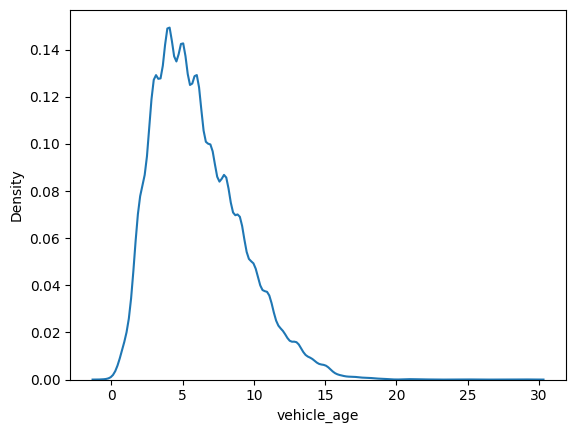

In [101]:
sns.kdeplot(age)

<Axes: xlabel='vehicle_age'>

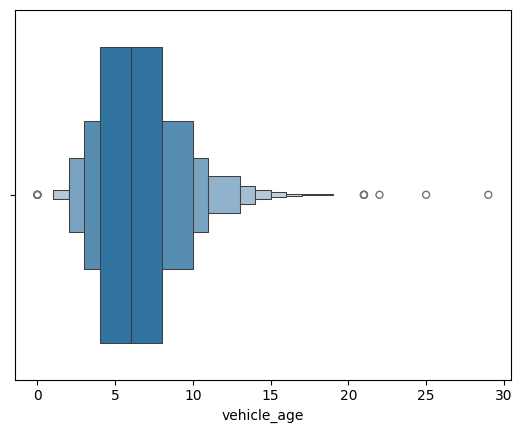

In [127]:
sns.boxenplot(x=age)

In [117]:
df[(age>15)]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
245,Maruti Alto,Maruti,Alto,16,70000,Individual,Petrol,Manual,19.7,796,46.30,5,85000
344,Maruti Alto,Maruti,Alto,16,5000,Individual,Petrol,Manual,19.7,796,46.30,5,95000
371,Maruti Alto,Maruti,Alto,16,56700,Individual,Petrol,Manual,19.7,796,46.30,5,75000
454,Maruti Wagon R,Maruti,Wagon R,16,33650,Individual,Petrol,Manual,18.9,998,67.10,5,110000
529,Maruti Wagon R,Maruti,Wagon R,17,50000,Individual,Petrol,Manual,18.9,998,67.10,5,62000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14803,Honda CR-V,Honda,CR-V,17,87000,Dealer,Petrol,Automatic,13.7,1997,153.86,5,450000
14885,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,17,126000,Dealer,Diesel,Automatic,11.0,2987,198.50,5,315000
14895,Maruti Alto,Maruti,Alto,16,91000,Dealer,Petrol,Manual,19.7,796,46.30,5,125000
15007,Maruti Wagon R,Maruti,Wagon R,16,50000,Individual,Petrol,Manual,18.9,998,67.10,5,75000


### Inference

- doesnt seem logical to keep the cars that are being sold after 15 years 
- might act as outliers gotta see

In [122]:
km = df["km_driven"]

In [123]:
km.describe()

count    1.524400e+04
mean     5.563958e+04
std      5.176630e+04
min      1.000000e+02
25%      3.000000e+04
50%      5.000000e+04
75%      7.000000e+04
max      3.800000e+06
Name: km_driven, dtype: float64

<Axes: xlabel='km_driven', ylabel='Density'>

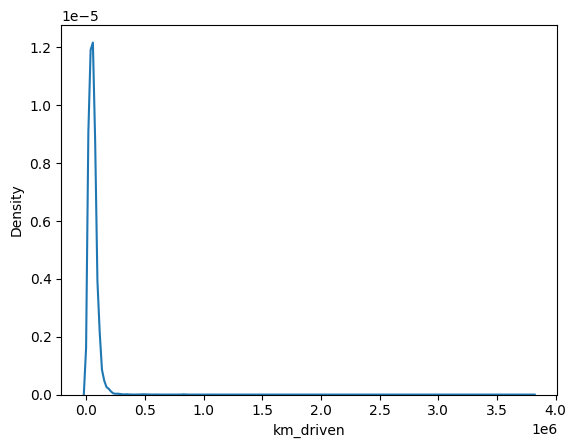

In [128]:
sns.kdeplot(km)

<Axes: xlabel='km_driven'>

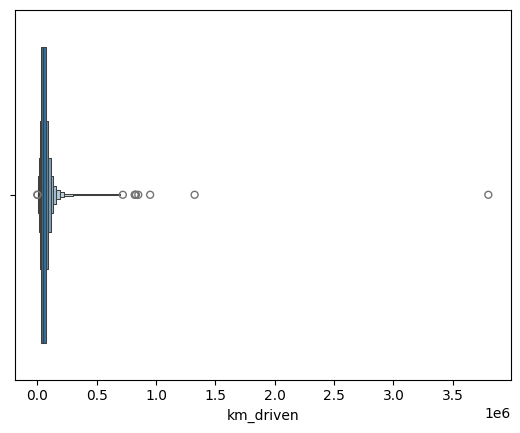

In [133]:
sns.boxenplot(x=km)

In [ ]:
(km > 0.2 * 1e6).sum()

np.int64(85)

In [147]:
df[km > 0.2 * 1e6]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
151,Mahindra Bolero,Mahindra,Bolero,13,220000,Individual,Diesel,Manual,13.60,2523,63.0,7,260000
249,Volkswagen Polo,Volkswagen,Polo,11,350000,Individual,Petrol,Manual,16.47,1198,73.9,5,173000
335,Volkswagen Vento,Volkswagen,Vento,10,280000,Individual,Diesel,Manual,20.54,1598,103.6,5,300000
394,Honda Amaze,Honda,Amaze,8,208000,Individual,Diesel,Manual,25.80,1498,98.6,5,300000
684,Toyota Innova,Toyota,Innova,8,387000,Individual,Diesel,Manual,12.99,2494,100.6,8,700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13828,Renault Duster,Renault,Duster,8,250000,Individual,Diesel,Manual,20.45,1461,83.8,5,550000
13843,Maruti Ciaz,Maruti,Ciaz,4,450003,Dealer,Petrol,Manual,20.73,1373,91.1,5,690000
15284,Toyota Innova,Toyota,Innova,6,270000,Individual,Diesel,Manual,12.99,2494,100.6,7,1300000
15325,Honda City,Honda,City,7,220000,Dealer,Diesel,Manual,26.00,1498,98.6,5,550000


### Inference

- Seems like there are a lot of outliers
- Who even drives their cars for more than 500,000 kms 

### seller_type

In [149]:
seller = df["seller_type"]

In [151]:
seller.unique(), seller.nunique()

(array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object), 3)

In [159]:
seller.value_counts()

seller_type
Dealer              9459
Individual          5612
Trustmark Dealer     173
Name: count, dtype: int64

<Axes: xlabel='seller_type', ylabel='count'>

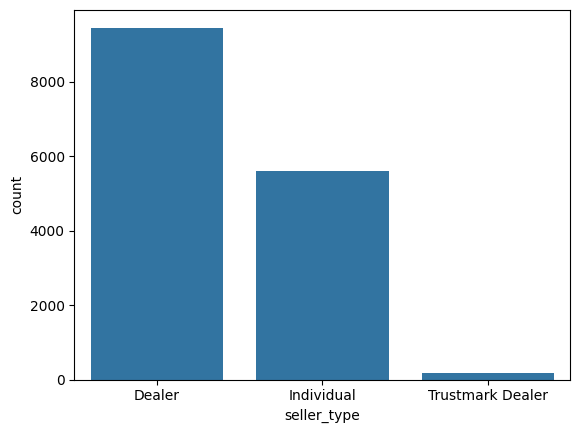

In [158]:
sns.barplot(seller.value_counts())